In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


#  **Dataset**

This notebook contains analysis of a dataset containing the medical records of 299 heart failure patients collected at Faisalabad Institute of Cardiology and Allied Hospital in Faisalabad (Punjab, Pakistan) during April-December 2015. The patients were 105 women and 194 men, aged between 40 and 95 years.

# Conclusions:

* Men had higher values of creatinine phosphokinase.

* Patients with a positive death event had a higher mean age than patients without the death event.

* Low levels (outliers) of sodium in the blood have been found in smokers and no-smokers.(*An abnormally low level of sodium in the blood can be caused by heart failure.*) 

* Patients with the positive death event had a shorter mean treatment time.

* The correlation matrix shows a strong correlation of the attributes ejection fraction and serum sodium for the target death event.

# Predictions

* Accuracy of Gaussian Naive Bayes  is 73.33%.

* Accuracy of Logistic Regression is 75.0 %.

* Accuracy of Random Forest is 76.66%.





# Import and read data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from yellowbrick.classifier import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier




/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv')

# Understanding the data

In [4]:
df.shape

(299, 13)

In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [6]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [7]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [9]:
df.nunique().sort_values()

anaemia                       2
diabetes                      2
high_blood_pressure           2
sex                           2
smoking                       2
DEATH_EVENT                   2
ejection_fraction            17
serum_sodium                 27
serum_creatinine             40
age                          47
time                        148
platelets                   176
creatinine_phosphokinase    208
dtype: int64

In [10]:
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


# EXPLORATORY DATA ANALYSIS

In [11]:
age_min = df.age.min()
age_max = df.age.max()
print(f"The dataset contains patients aged between {age_min} and {age_max} years.")

The dataset contains patients aged between 40.0 and 95.0 years.


In [12]:
woman = len(df.query("sex==0"))
man =  len(df) - woman
print(f"The dataset contains {man} male patients and {woman} female patients.")

The dataset contains 194 male patients and 105 female patients.


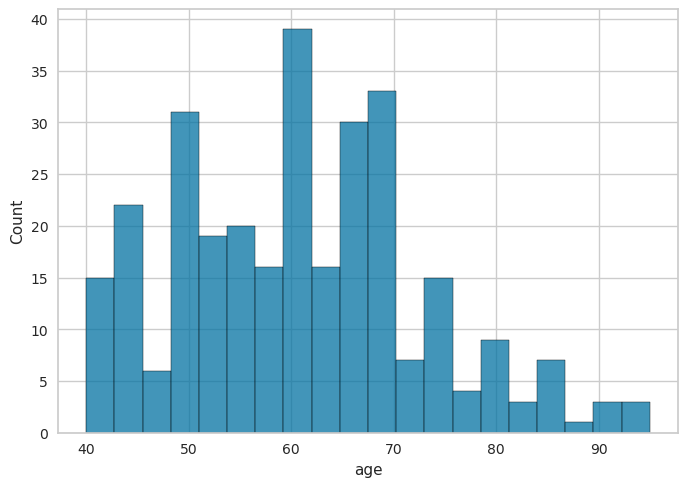

In [13]:
#Histogram with the age distribution of patients

sns.histplot(df['age'], bins = 20) 
plt.show()

In [14]:
df.groupby('DEATH_EVENT')['creatinine_phosphokinase'].median()


DEATH_EVENT
0    245.0
1    259.0
Name: creatinine_phosphokinase, dtype: float64

<Axes: xlabel='sex', ylabel='creatinine_phosphokinase'>

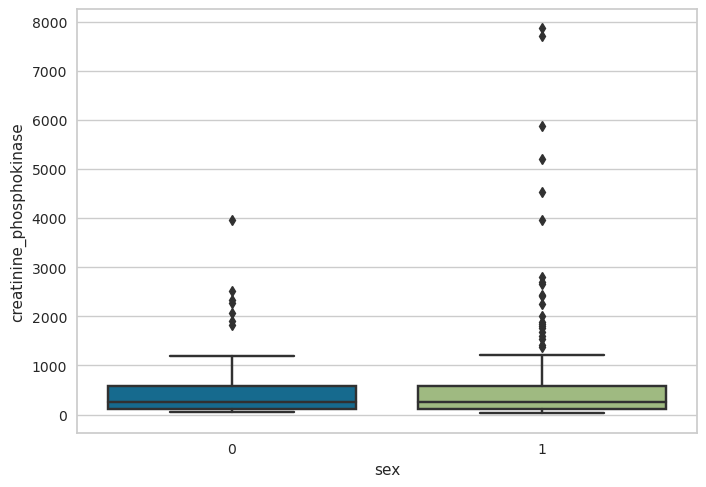

In [15]:
# Difference between creatinine phosphokinase between male and female patients. Men had higher values.

# Creatinine phosphokinase (CPK) indicates the level of the CPK enzyme in the blood. 
#When muscle tissue is damaged, CPK flows into the blood. 
#Therefore, high levels of CPK in a patient's blood may indicate heart failure or injury.

sns.boxplot(data=df, x = 'sex', y='creatinine_phosphokinase')

<Axes: xlabel='DEATH_EVENT', ylabel='age'>

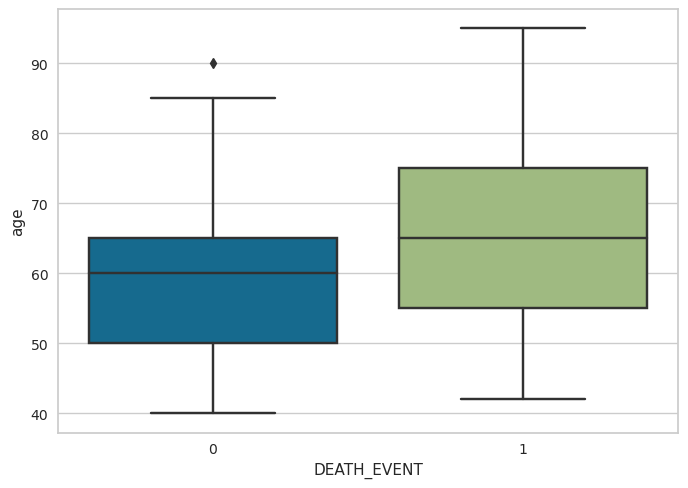

In [16]:
#Patients with a positive death event had a higher mean age than patients without the death event.

sns.boxplot(data=df, x = 'DEATH_EVENT', y='age')

<Axes: xlabel='smoking', ylabel='serum_sodium'>

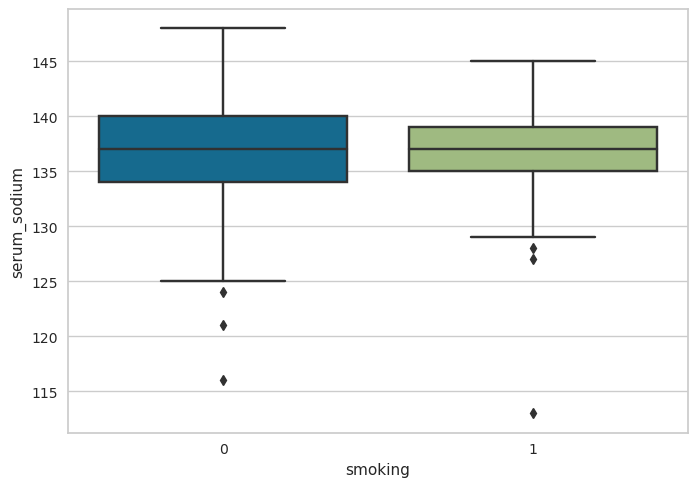

In [17]:
#Comparison between the sodium level in the blood of smokers and non-smokers. 
#Low levels (outliers) have been found in smokers and no-smokers. 
#An abnormally low level of sodium in the blood can be caused by heart failure.

sns.boxplot(data=df, x = 'smoking', y='serum_sodium')

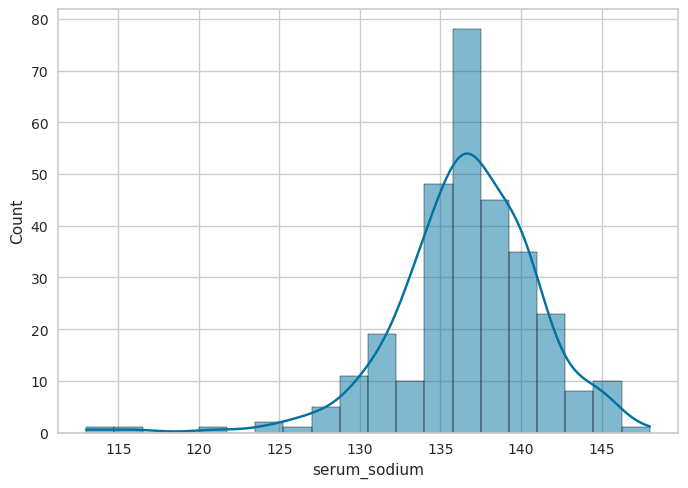

In [18]:
sns.histplot(df['serum_sodium'], bins = 20, kde = True) 
plt.show()

<Axes: xlabel='sex', ylabel='ejection_fraction'>

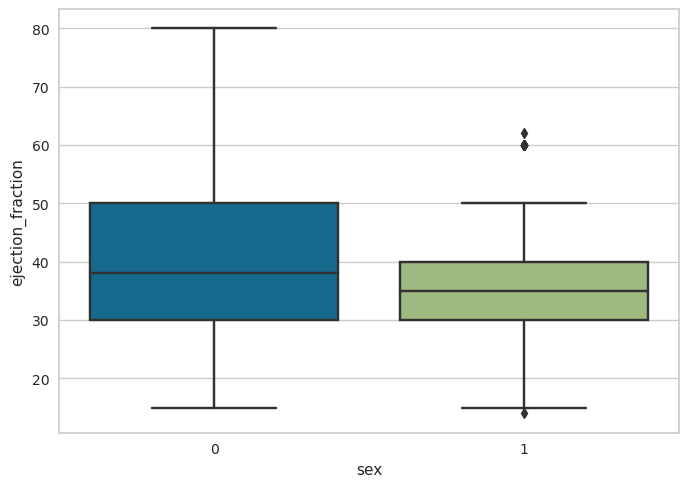

In [19]:
sns.boxplot(data=df, x = 'sex', y='ejection_fraction')

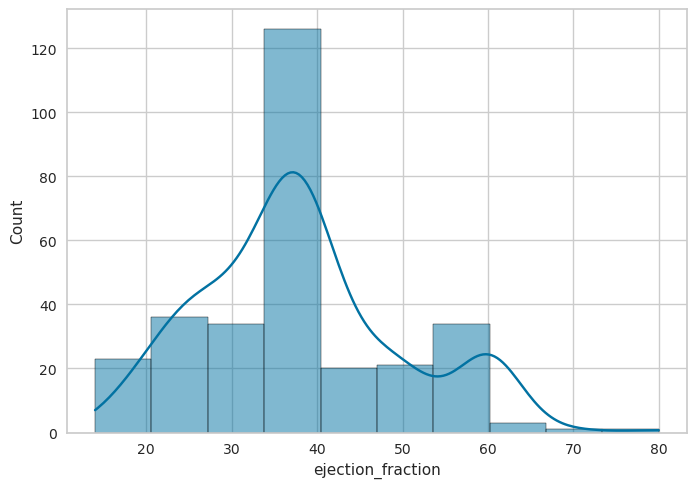

In [20]:
sns.histplot(df['ejection_fraction'], bins = 10, kde = True) 
plt.show()

<Axes: xlabel='diabetes', ylabel='age'>

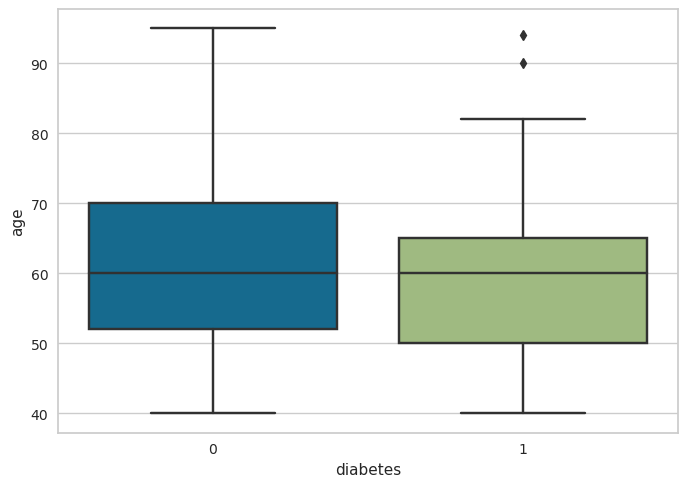

In [21]:
sns.boxplot(data=df, x = 'diabetes', y='age')

<Axes: xlabel='DEATH_EVENT', ylabel='time'>

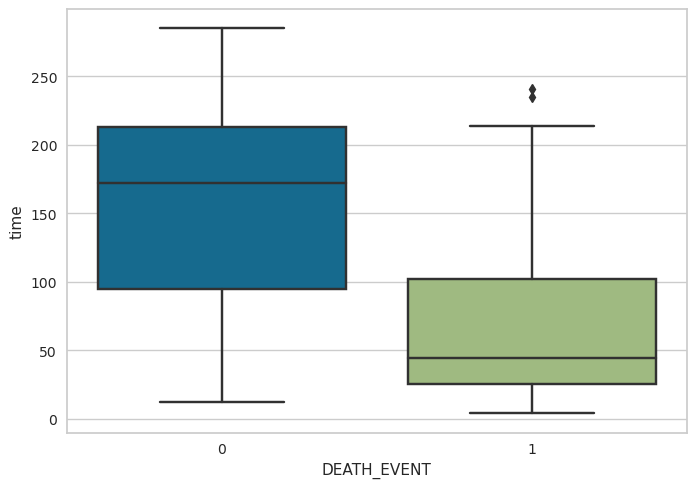

In [22]:
#Comparison between treatment time and death event among patients. 
#Patients with the positive death event had a shorter mean treatment time.

sns.boxplot(data=df, x = 'DEATH_EVENT', y='time')

<Axes: >

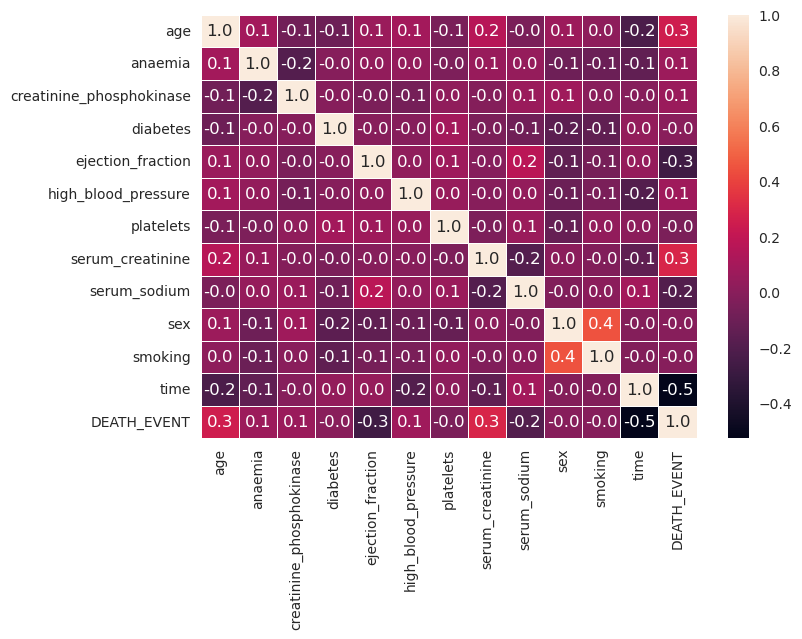

In [23]:
#The correlation matrix shows a strong correlation of the attributes ejection fraction and serum sodium for the target death event.

#df_semtime = df.drop('time', axis =1)
#correlacao = df_semtime.corr()
correlacao = df.corr()
plot = sns.heatmap(correlacao, annot = True, fmt=".1f", linewidths=.6)
plot

# Data Modeling

**Train Test Split**

In [24]:
y = df.DEATH_EVENT

df_features = ['ejection_fraction', 'serum_sodium']
X = df[df_features]

train_X, val_X, train_y, val_y = train_test_split(X, y,test_size = 0.2, random_state = 2)

**Gaussian Naive Bayes (GaussianNB)**

In [25]:
naive_model = GaussianNB()
naive_model.fit(train_X, train_y)
df_preds = naive_model.predict(val_X)



In [26]:
confusao = confusion_matrix(val_y, df_preds)
confusao

array([[40,  3],
       [13,  4]])

In [27]:
taxa_acerto = accuracy_score(val_y, df_preds)
taxa_erro = 1 - taxa_acerto
acerto = 100*taxa_acerto
acerto
print(f" Accuracy of Gaussian Naive Bayes  is {acerto} %")

 Accuracy of Gaussian Naive Bayes  is 73.33333333333333 %


(<Figure size 800x550 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

<Figure size 800x550 with 0 Axes>

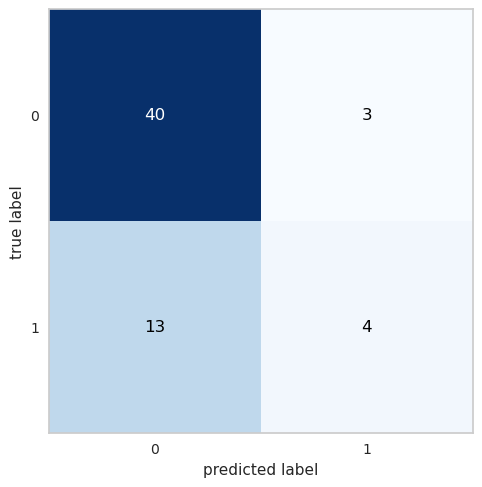

In [28]:
m = confusion_matrix(val_y, df_preds)
plt.figure()
plot_confusion_matrix(m)
    

**Logistic Regression**

In [29]:
logi_model = LogisticRegression()
logi_model.fit(train_X, train_y)
logi_preds = logi_model.predict(val_X)


In [30]:
confusao = confusion_matrix(val_y, logi_preds)
confusao

array([[40,  3],
       [12,  5]])

In [31]:
logi_acerto = accuracy_score(val_y, logi_preds)
acerto = 100*logi_acerto
acerto
print(f" Accuracy of Logistic Regression is {acerto} %")

 Accuracy of Logistic Regression is 75.0 %


(<Figure size 800x550 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

<Figure size 800x550 with 0 Axes>

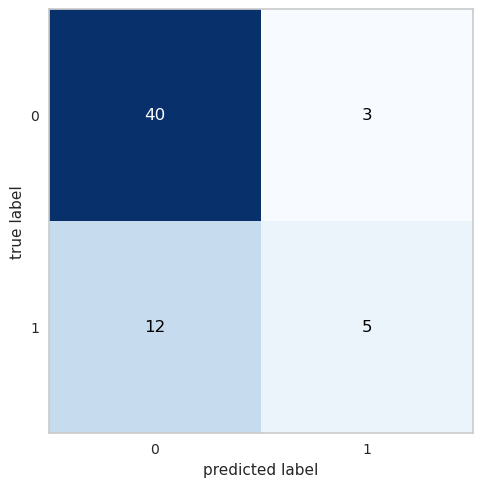

In [32]:
m = confusion_matrix(val_y, logi_preds)
plt.figure()
plot_confusion_matrix(m)

**Random Forest**

In [33]:

rf_model = RandomForestClassifier(max_features=0.5, max_depth=1,random_state=1)
rf_model.fit(train_X, train_y)
rf_preds = rf_model.predict(val_X)


In [34]:
confusao = confusion_matrix(val_y, rf_preds)
confusao

array([[42,  1],
       [13,  4]])

In [35]:
rf_acerto = accuracy_score(val_y, rf_preds)
rf_acerto
acerto = 100*rf_acerto
acerto
print(f" Accuracy of Random Forest is {acerto} %")

 Accuracy of Random Forest is 76.66666666666667 %


(<Figure size 800x550 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

<Figure size 800x550 with 0 Axes>

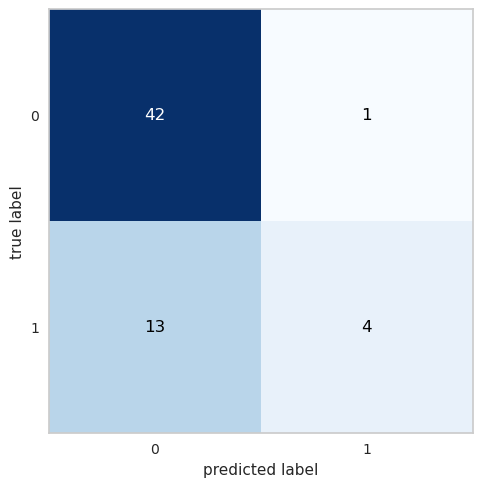

In [36]:
m = confusion_matrix(val_y, rf_preds)
plt.figure()
plot_confusion_matrix(m)